#EECS 442 PS1: Filtering

__Please provide the following information__
(e.g. Andrew Owens, ahowens):

Maithreyan Ganesh, maithgan

__Important__:
1. after you download the .ipynb file, please name it as __your_uniquename_your_umid.ipynb__ before you submit it to canvas. Example: adam_01101100.ipynb.
2. Please convert the your Colab notebook to a PDF file and submit the PDF file to Gradescope. You can follow [this](https://docs.google.com/document/d/1U49zxpV736_BIUh_mfCn66D20UYAGsKQbfJPvwuiX1s/edit?usp=sharing) instructions. For your convenience, we have included the PDF conversion script at the end of this notebook.  




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).



# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [28]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request

# Download the images that you'll need
base_url = 'http://www.eecs.umich.edu/courses/eecs442/fa24/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

<ipython-input-29-d37c63411787>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog-1.jpg')


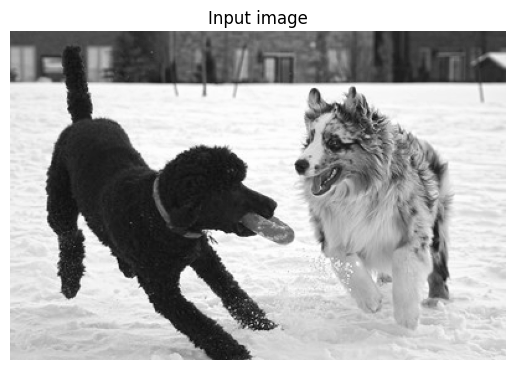

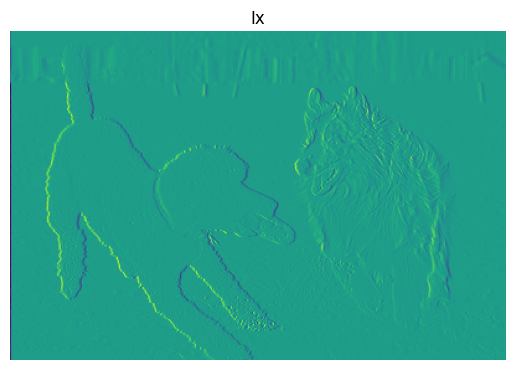

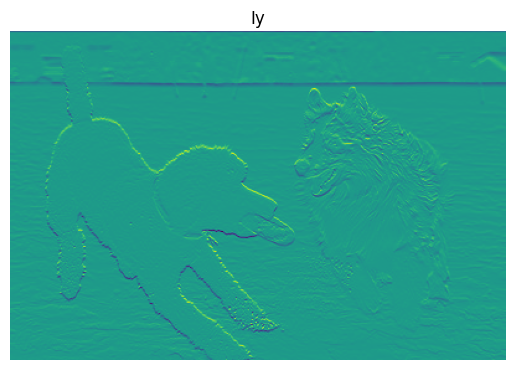

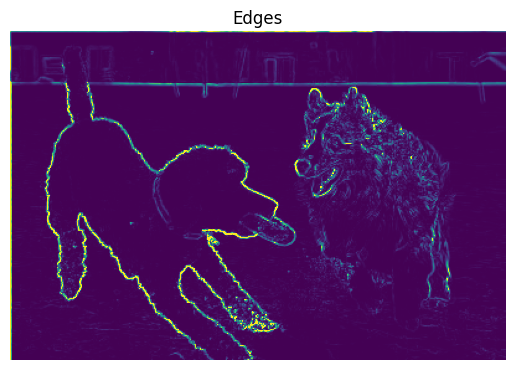

In [29]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

# Your code here!
def convolve(im,filter):#inputs im-grayscale and h is filter
  image_height,image_width=im.shape
  h=np.flip(filter)
  filter_height,filter_width=h.shape

  #print(filter_height, filter_width)

  #zero padding required during convolution
  pad_height=filter_height//2
  pad_width=filter_width//2

  #print(pad_height, pad_width)
  padded_image = np.pad(im, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
  output = np.zeros((image_height, image_width))

  for y in range(image_height):
    for x in range(image_width):
      # region of interest
      roi = padded_image[y:y + filter_height, x:x + filter_width]
      # Perform element-wise multiplication and sum
      output[y, x] = np.sum(roi * filter)

  return output

dx=np.array([[1,-1]])
dy=np.array([[1,-1]]).transpose()
# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
# The `vmin' and `vmax' parameters are set so that 0 is always set to be
# the lowest value and the highest value is set on a per-input basis
# to the 99th percentile value in `edges'.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

In [30]:
Ix.shape

(265, 400)

<ipython-input-31-28a704ba9f9d>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog-2.jpg').mean(2)/255.


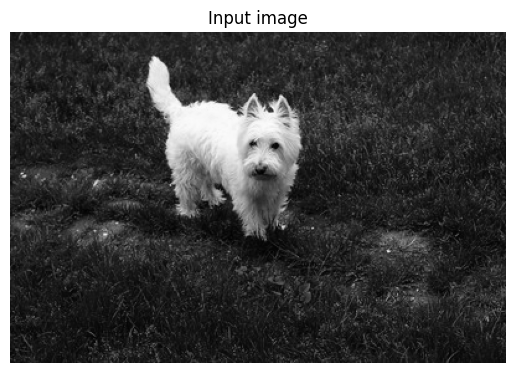

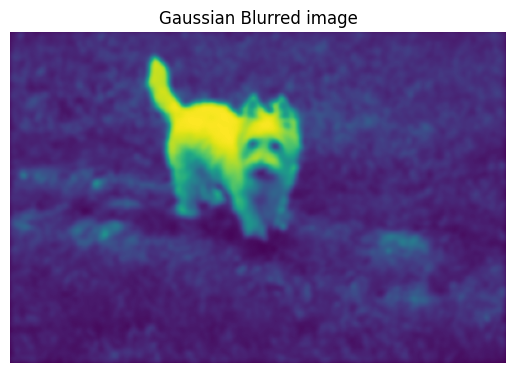

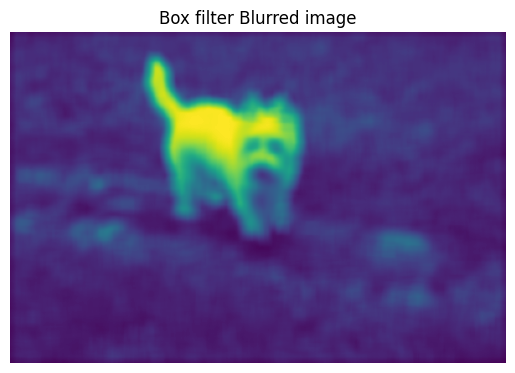

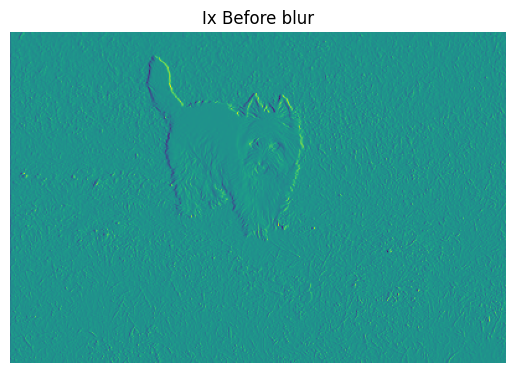

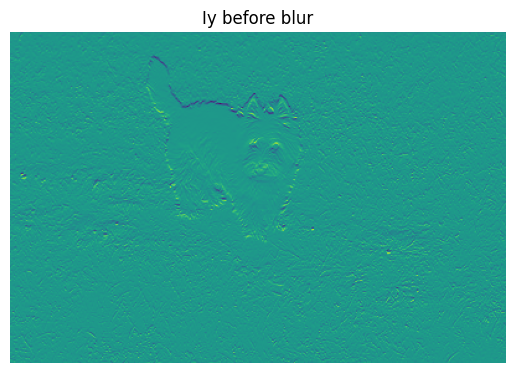

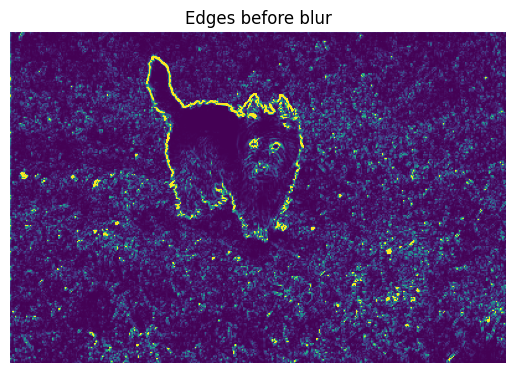

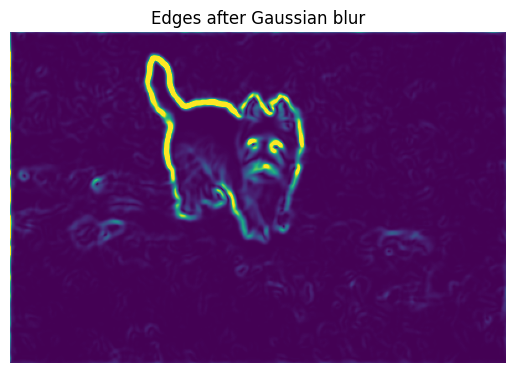

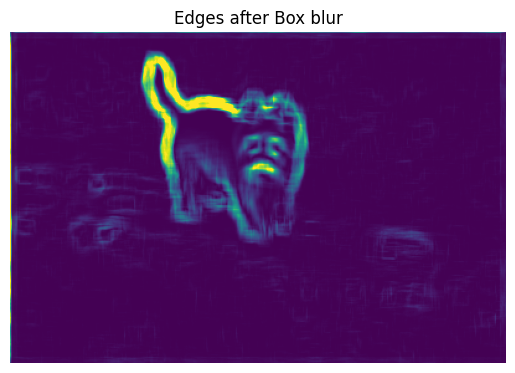

In [31]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# Your code here!
def gaussian_filter(sigma, size,mu=0):
  ax=np.linspace(-(size//2),size//2,size)
  gaussian_1d = (1/(2*np.pi*sigma))*np.exp(-1*np.square((ax-mu))/(2*np.square(sigma)))
  gaussian_2d = np.outer(gaussian_1d,gaussian_1d)
  gaussian_2d = gaussian_2d / np.sum(gaussian_2d) #Normalize the gaussian between 0-1
  return gaussian_2d

def box_filter(value,dimension):
  box=np.full((dimension,dimension),value)
  return box

#Gaussian Blurred image
Blurred_image=convolve(im,gaussian_filter(2,11,0))

#Box filter blurred image
Box_blur=convolve(im,box_filter(1/(11**2),11))

# Edge filters
dx=np.array([[1,-1]])
dy=np.array([[1,-1]]).transpose()

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

Ix1 = convolve(Blurred_image, dx)
Iy1 = convolve(Blurred_image, dy)
edges1 = Ix1**2. + Iy1**2.

Ix2 = convolve(Box_blur, dx)
Iy2 = convolve(Box_blur, dy)
edges2 = Ix2**2. + Iy2**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Gaussian Blurred image')
plt.axis('off')
plt.imshow(Blurred_image)

plt.figure()
plt.title('Box filter Blurred image')
plt.axis('off')
plt.imshow(Box_blur)

plt.figure()
plt.axis('off')
plt.title('Ix Before blur')
plt.imshow(Ix)

plt.figure()
plt.title('Iy before blur')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges before blur')
plt.axis('off')
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

plt.figure()
plt.title('Edges after Gaussian blur')
plt.axis('off')
plt.imshow(edges1, vmin = 0., vmax = np.percentile(edges1, 99))

plt.figure()
plt.title('Edges after Box blur')
plt.axis('off')
plt.imshow(edges2, vmin = 0., vmax = np.percentile(edges2, 99))

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

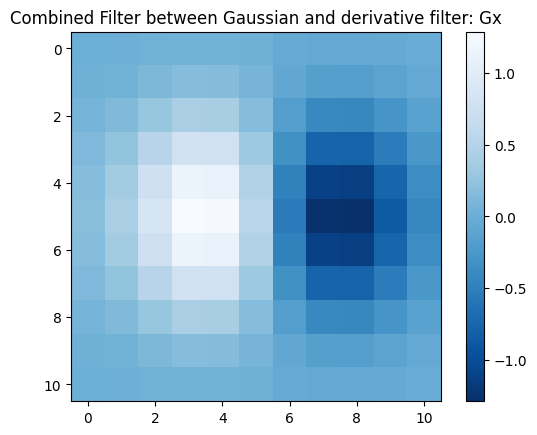

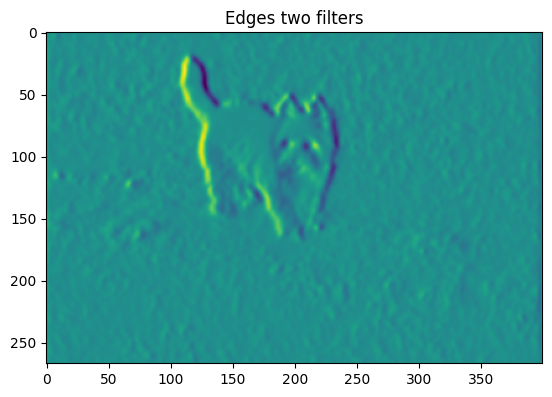

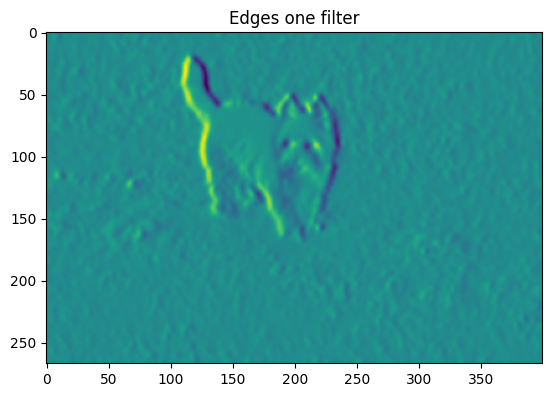

In [32]:
# Your code here!
def gaussian_filter(sigma, size,mu=0):
  ax=np.linspace(-(size//2),size//2,size)
  gaussian_1d = (1/(2*np.pi*sigma))*np.exp(-1*np.square((ax-mu))/(2*np.square(sigma)))
  gaussian_2d = np.outer(gaussian_1d,gaussian_1d)
  gaussian_2d = gaussian_2d / np.sum(gaussian_2d) #Normalize the gaussian between 0-1
  return gaussian_2d

def filter_combination(gauss_filter,filter1):
  filter=convolve(gauss_filter,filter1)
  filter=filter / np.sum(filter)#normalize
  return filter

def visualize_filter(filter):
  plt.imshow(filter,cmap='Blues_r')
  plt.colorbar()
  plt.title('Combined Filter between Gaussian and derivative filter: Gx')
  plt.show()

# Edge filters
dx=np.array([[1,-1]])
dy=np.array([[1,-1]]).transpose()

#combined filter
Gx=filter_combination(gaussian_filter(2,11,0),dx)

#visualize filter
visualize_filter(Gx)

#Gaussian Blurred image
Blurred_image=convolve(im,gaussian_filter(2,11,0))

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(Blurred_image, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

<ipython-input-33-590fae3013dd>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('apple.jpg').mean(2)/255.


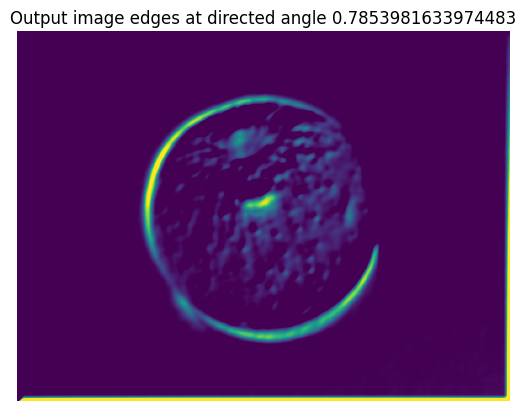

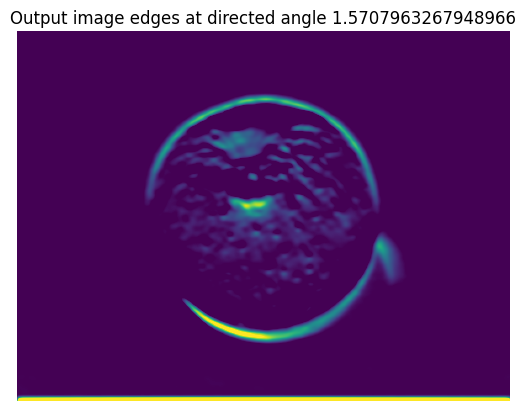

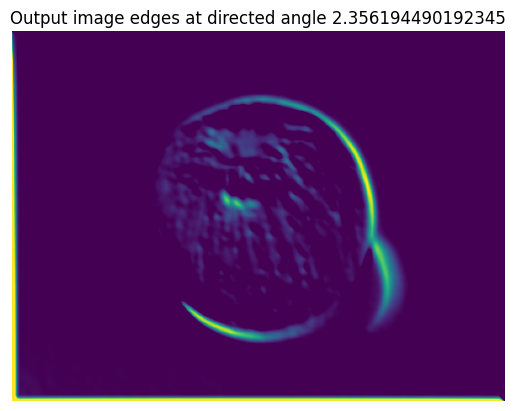

In [33]:
im = imageio.imread('apple.jpg').mean(2)/255.

#Gaussian Blurred image
im=convolve(im,gaussian_filter(2,11,0))

# Your code here!
def oriented_grad(dx,dy,theta):
  Filter=dx*np.cos(theta)+dy*np.sin(theta)
  #Filter=Filter/np.sum(Filter)
  return Filter

dx=np.array([[1,-1]])
dy=np.array([[1,-1]]).transpose()
theta=[np.pi/4,np.pi/2,np.pi*(3/4)]

for i in theta:
  filter_directed=oriented_grad(dx,dy,i)
  output_image=convolve(im,filter_directed)
  plt.figure()
  plt.axis('off')
  plt.title('Output image edges at directed angle '+ str(i))
  plt.imshow(output_image, vmin = 0., vmax = np.percentile(output_image, 99))
  #visualize_filter(filter_directed)


# Problem 1.2 Pet edge detection (f)

Please visualize the results using matplotlib.

<ipython-input-34-cb8a95a048ad>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_im = imageio.imread('dog-1.jpg').mean(2)/255.


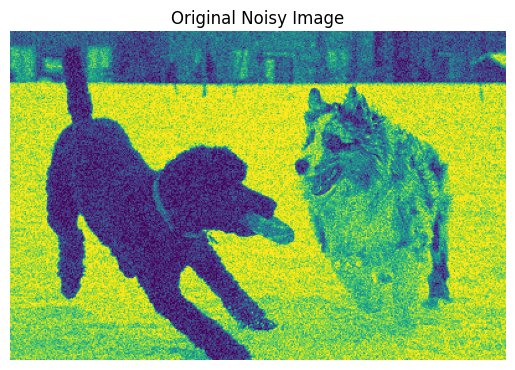

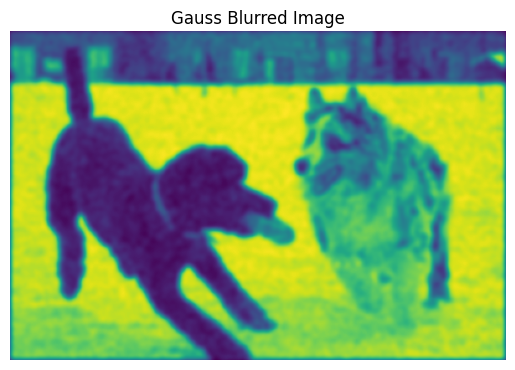

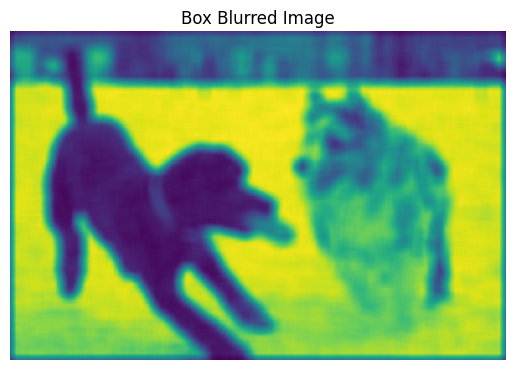

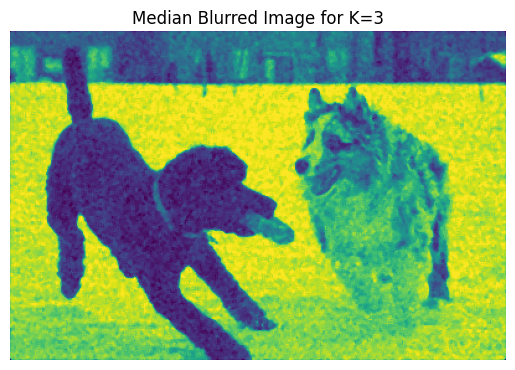

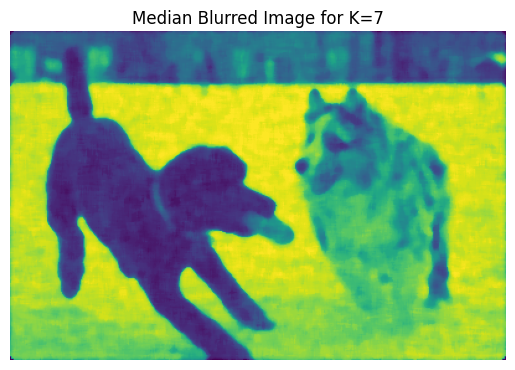

In [34]:
# Sample a noisy pet image
noisy_im = imageio.imread('dog-1.jpg').mean(2)/255.
noisy_im = noisy_im + np.random.randn(*noisy_im.shape) * 0.1
noisy_im = np.clip(noisy_im, 0, 1)

# Your code here!
def median_filter(image, k):
    image_height, image_width = image.shape
    pad_size = k // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for y in range(image_height):
        for x in range(image_width):
            region = padded_image[y:y + k, x:x + k]
            output[y, x] = np.median(region)
    return output

def gaussian_filter(sigma, size,mu=0):
  ax=np.linspace(-(size//2),size//2,size)
  gaussian_1d = (1/(2*np.pi*sigma))*np.exp(-1*np.square((ax-mu))/(2*np.square(sigma)))
  gaussian_2d = np.outer(gaussian_1d,gaussian_1d)
  gaussian_2d = gaussian_2d / np.sum(gaussian_2d) #Normalize the gaussian between 0-1
  return gaussian_2d

def box_filter(value,dimension):
  box=np.full((dimension,dimension),value)
  return box

plt.figure()
plt.axis('off')
plt.title('Original Noisy Image')
plt.imshow(noisy_im)


#Gaussian Blurred image
Gauss=convolve(noisy_im,gaussian_filter(2,11,0))
plt.figure()
plt.axis('off')
plt.title('Gauss Blurred Image')
plt.imshow(Gauss)


#Box filter blurred image
Box=convolve(noisy_im,box_filter(1/(11**2),11))
plt.figure()
plt.axis('off')
plt.title('Box Blurred Image')
plt.imshow(Box)

#Median Filter for k=3
median_K3 = median_filter(noisy_im, k=3)
plt.figure()
plt.axis('off')
plt.title('Median Blurred Image for K=3')
plt.imshow(median_K3)

#Median Filter for k=7
median_K7 = median_filter(noisy_im, k=7)
plt.figure()
plt.axis('off')
plt.title('Median Blurred Image for K=7')
plt.imshow(median_K7)

# Convert Notebook to PDF

In [40]:
import os
notebookpath = '/content/drive/MyDrive/Colab_Notebooks/maithgan_22638966.ipynb'
drive_mount_point = '/content/drive/'
from google.colab import drive
drive.mount(drive_mount_point , force_remount=True)

Mounted at /content/drive/


In [41]:
# generate pdf
# Please provide the full path of the notebook file below
# Important: make sure that your file name does not contain spaces!

file_name = notebookpath.split('/')[-1]
get_ipython().system("apt update && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended")
get_ipython().system("pip install pypandoc")
get_ipython().system("apt-get install texlive texlive-xetex texlive-latex-extra pandoc")
get_ipython().system("jupyter nbconvert --to PDF {}".format(notebookpath.replace(' ', '\\ ')))
from google.colab import files
files.download(notebookpath.split('.')[0]+'.pdf')

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 128 kB in 2s (79.9 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
51 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire o

FileNotFoundError: Cannot find file: /content/drive/MyDrive/Colab_Notebooks/maithgan_22638966.pdf

In [ ]:
print("/content/drive/MyDrive/")

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/Colab_Notebooks/maithgan_22638966.ipynb"))

In [ ]:
import os
print(os.path.exists('/content/drive/My Drive/Colab Notebooks/maithgan_22638966.ipynb'))